In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('profiles.csv')
data.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
data.speaks.head()

0                                              english
1    english (fluently), spanish (poorly), french (...
2                                 english, french, c++
3                             english, german (poorly)
4                                              english
Name: speaks, dtype: object

In [4]:
list(data.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

The example given by Codecademy used various parameters to predict an astrological sign. I want to see if I can do something else... I will need to find out if there are other columns that have an even spread in the way that sign does. Let's do some exploring.

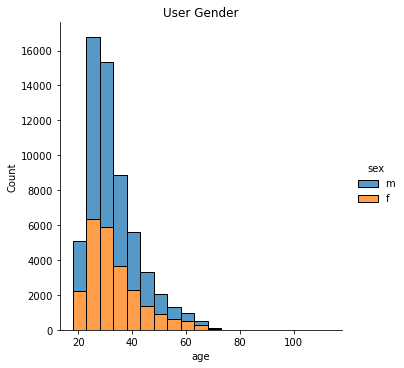

In [117]:
sns.displot(data=data, x='age', hue='sex', kind='hist', binwidth=5, multiple='stack');
plt.title('User Gender')
plt.savefig('Men-Women.png',bbox_inches='tight')

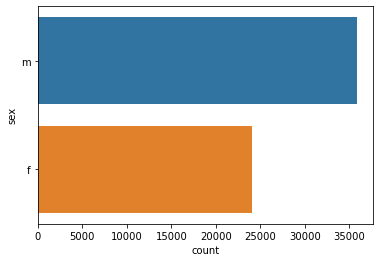

In [6]:
sns.countplot(data=data, y='sex');

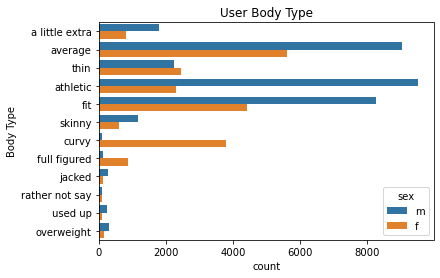

In [116]:
sns.countplot(data=data, y='body_type', hue='sex');
plt.title('User Body Type')
plt.ylabel('Body Type')
plt.savefig('Body Type.png',bbox_inches='tight')

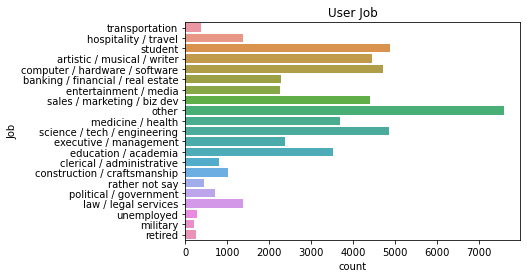

In [115]:
sns.countplot(data=data, y='job');
plt.title('User Job')
plt.ylabel('Job')
plt.savefig('Job.png',bbox_inches='tight')

Maybe I could predict jobs...

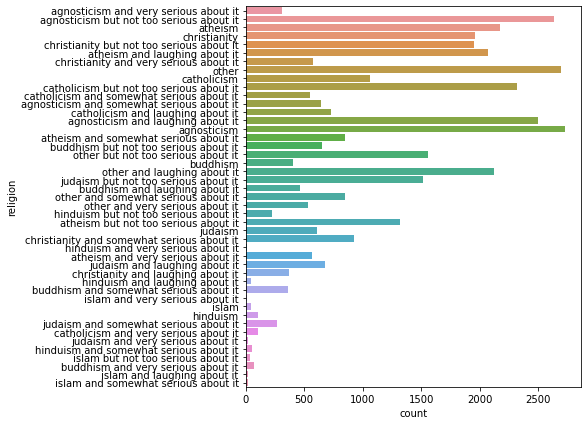

In [9]:
plt.figure(figsize=(6,7))
sns.countplot(data=data, y='religion');

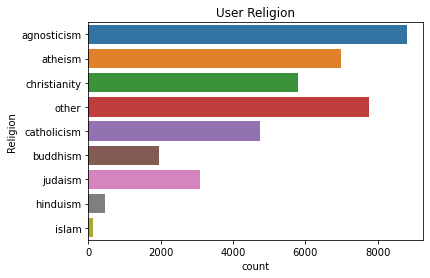

In [114]:
data['religion_cleaned']=data.religion.str.split().str.get(0)
sns.countplot(data=data, y='religion_cleaned');
plt.title('User Religion')
plt.ylabel('Religion')
plt.savefig('Religion.png',bbox_inches='tight')

religion is fairly even as well... might work in conjunction with job

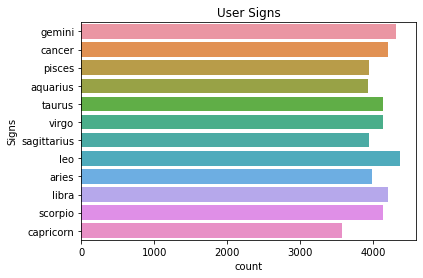

In [113]:
data['signs_cleaned']=data.sign.str.split().str.get(0)
sns.countplot(data=data, y='signs_cleaned');
plt.title('User Signs')
plt.ylabel('Signs')
plt.savefig('Signs.png', bbox_inches='tight')

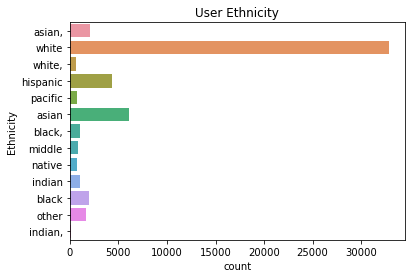

In [118]:
data['ethnicity_cleaned']=data.ethnicity.str.split().str.get(0)
sns.countplot(data=data, y='ethnicity_cleaned');
plt.title('User Ethnicity')
plt.ylabel('Ethnicity')
plt.savefig('Ethnicity.png',bbox_inches='tight')

So I think the question is going to be can we use job, religion and sign as predictors of one another? I would still love to set up the information in such a way to predict these things based on an essay answer...

In [13]:
data.isnull().sum()

age                      0
body_type             5296
diet                 24395
drinks                2985
drugs                14080
education             6628
essay0                5488
essay1                7572
essay2                9638
essay3               11476
essay4               10537
essay5               10850
essay6               13771
essay7               12451
essay8               19225
essay9               12603
ethnicity             5680
height                   3
income                   0
job                   8198
last_online              0
location                 0
offspring            35561
orientation              0
pets                 19921
religion             20226
sex                      0
sign                 11056
smokes                5512
speaks                  50
status                   0
religion_cleaned     20226
signs_cleaned        11056
ethnicity_cleaned     5680
dtype: int64

After working through the various criteria there needed to be sufficient data added to really be predictive. With the exception of ethnicity, which skews towards "white", there was a broad spectrum of responses from the other datasets. Additionally there was a variation between chosen vs. pre-determined categories (ethnicity and body type vs. job and relgion for example). 

In [142]:
cols = ['job','religion_cleaned','ethnicity_cleaned','body_type','speaks','signs_cleaned']
df = data[cols].dropna()
df.shape

(28661, 6)

In [143]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [144]:
df.head()

,signs_cleaned,job_artistic / musical / writer,job_banking / financial / real estate,job_clerical / administrative,job_computer / hardware / software,job_construction / craftsmanship,job_education / academia,job_entertainment / media,job_executive / management,job_hospitality / travel,...,"speaks_english, vietnamese, french","speaks_english, vietnamese, spanish","speaks_english, vietnamese, spanish (okay)","speaks_english, vietnamese, spanish (poorly)","speaks_english, vietnamese, thai, chinese, spanish","speaks_english, welsh (poorly)","speaks_english, yiddish (fluently), tagalog (fluently), sanskrit (fluently), lisp (fluently)","speaks_english, yiddish (poorly)","speaks_english, yiddish (poorly), english (fluently)","speaks_english, yiddish (poorly), spanish (okay), latin (poorly)"
0,gemini,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,cancer,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,taurus,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,sagittarius,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,cancer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
col_length = len(df.columns)

X = df.iloc[:, 1:col_length]
Y = df.iloc[:, 0:1]

val_size = 0.2

from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state = 0)

Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [147]:
lr_model = LogisticRegression(multi_class='multinomial').fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)

C:\Users\Kate_and_Dustin.SPENCE\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [148]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.27      0.24      0.26      1834
       aries       0.26      0.27      0.27      1892
      cancer       0.30      0.28      0.29      1978
   capricorn       0.47      0.21      0.29      1692
      gemini       0.22      0.36      0.27      2095
         leo       0.24      0.30      0.27      2051
       libra       0.26      0.29      0.27      1958
      pisces       0.36      0.22      0.27      1827
 sagittarius       0.37      0.24      0.29      1829
     scorpio       0.34      0.25      0.29      1884
      taurus       0.26      0.30      0.28      1939
       virgo       0.23      0.30      0.26      1949

    accuracy                           0.28     22928
   macro avg       0.30      0.27      0.28     22928
weighted avg       0.30      0.28      0.28     22928



Linnear Regression only provided 28% accuracy in making an accurate prediction.

In [149]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_train)

In [150]:
print(classification_report(Y_train, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.24      0.62      0.34      1834
       aries       0.25      0.49      0.33      1892
      cancer       0.29      0.37      0.33      1978
   capricorn       0.30      0.33      0.31      1692
      gemini       0.33      0.30      0.31      2095
         leo       0.37      0.27      0.31      2051
       libra       0.37      0.25      0.30      1958
      pisces       0.39      0.24      0.30      1827
 sagittarius       0.41      0.19      0.26      1829
     scorpio       0.38      0.23      0.28      1884
      taurus       0.36      0.20      0.26      1939
       virgo       0.36      0.21      0.26      1949

    accuracy                           0.31     22928
   macro avg       0.34      0.31      0.30     22928
weighted avg       0.34      0.31      0.30     22928



K-Nearest Neighbor was slightly better with 31% accuracy.

In [151]:
cart_model = DecisionTreeClassifier().fit(X_train, Y_train)
cart_predictions = cart_model.predict(X_train)

In [152]:
print(classification_report(Y_train, cart_predictions))

              precision    recall  f1-score   support

    aquarius       0.59      0.85      0.69      1834
       aries       0.62      0.83      0.71      1892
      cancer       0.68      0.80      0.73      1978
   capricorn       0.71      0.77      0.74      1692
      gemini       0.71      0.74      0.73      2095
         leo       0.72      0.73      0.73      2051
       libra       0.76      0.70      0.73      1958
      pisces       0.83      0.68      0.75      1827
 sagittarius       0.84      0.68      0.75      1829
     scorpio       0.83      0.67      0.74      1884
      taurus       0.84      0.65      0.73      1939
       virgo       0.85      0.66      0.74      1949

    accuracy                           0.73     22928
   macro avg       0.75      0.73      0.73     22928
weighted avg       0.75      0.73      0.73     22928



The decission tree is the best model to work with as it gives us 73% accuracy. Likely this is because the creation of the "pure leaves" however we'll want to be careful with this to make sure the model isn't over fitting.

In [153]:
from sklearn.metrics import confusion_matrix 
cart_cm = confusion_matrix(Y_train, cart_predictions)
cart_labels = cart_model.classes_

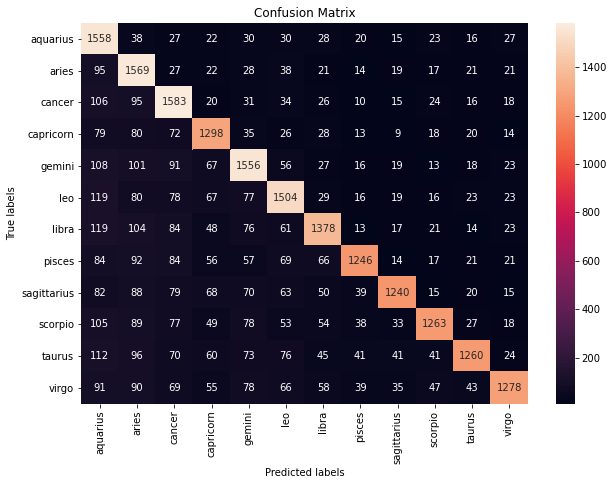

In [154]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);
plt.savefig('Confusion Matrix.png',bbox_inches='tight')

The confusion matrix above shows that the Decision Tree model gives us incredibly accurate results. Interestingly most accurate for Aquarius, aries, gemini, and leo.

In [155]:
cart_model.get_depth()

308

With 269 branches it acutally appears that the model is fit fairly well. 

In [156]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(cart_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.08220672 0.08482338 0.08111644 0.08287895 0.08266085]
Baseline: 8.27% (0.12%)


In [157]:
cart_model20 = DecisionTreeClassifier(max_depth = 20).fit(X_train, Y_train) 
cart_predictions20 = cart_model20.predict(X_train) 

In [158]:
print(classification_report(Y_train, cart_predictions20))

              precision    recall  f1-score   support

    aquarius       0.32      0.05      0.09      1834
       aries       0.20      0.08      0.12      1892
      cancer       0.55      0.04      0.07      1978
   capricorn       0.63      0.03      0.06      1692
      gemini       0.10      0.85      0.17      2095
         leo       0.51      0.04      0.07      2051
       libra       0.52      0.03      0.06      1958
      pisces       0.88      0.02      0.04      1827
 sagittarius       0.82      0.03      0.05      1829
     scorpio       0.18      0.07      0.10      1884
      taurus       0.43      0.02      0.04      1939
       virgo       0.13      0.12      0.12      1949

    accuracy                           0.12     22928
   macro avg       0.44      0.12      0.08     22928
weighted avg       0.43      0.12      0.09     22928



In [159]:
results20 = cross_val_score(cart_model20, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results20)
print("Baseline: %.2f%% (%.2f%%)" % (results20.mean()*100, results.std()*100))

[0.09332752 0.08962058 0.08918447 0.08811341 0.0959651 ]
Baseline: 9.12% (0.12%)


In [160]:
knn_predictionsVal = knn_model.predict(X_val) 
print(classification_report(Y_val, knn_predictionsVal))

              precision    recall  f1-score   support

    aquarius       0.08      0.20      0.11       445
       aries       0.09      0.17      0.12       470
      cancer       0.08      0.10      0.09       516
   capricorn       0.06      0.07      0.07       428
      gemini       0.08      0.07      0.07       503
         leo       0.08      0.06      0.07       487
       libra       0.08      0.06      0.07       497
      pisces       0.09      0.05      0.06       457
 sagittarius       0.11      0.05      0.06       457
     scorpio       0.10      0.06      0.08       479
      taurus       0.07      0.04      0.05       475
       virgo       0.07      0.04      0.05       519

    accuracy                           0.08      5733
   macro avg       0.08      0.08      0.08      5733
weighted avg       0.08      0.08      0.08      5733



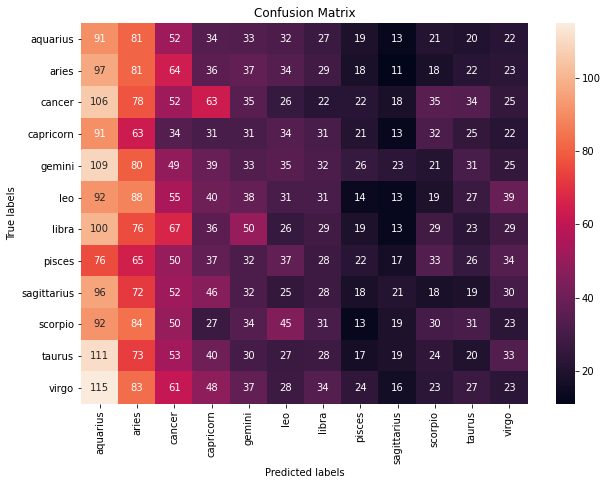

In [161]:
final_cm = confusion_matrix(Y_val, knn_predictionsVal)
knn_labels = knn_model.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm, annot=True, ax = ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels); 
ax.yaxis.set_ticklabels(knn_labels);